# **Análisis de resultados**

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

import urllib.request
import pickle

In [15]:
plt.rcParams['figure.facecolor'] = '#EEF4F3'
plt.rcParams['axes.facecolor'] = '#EEF4F3'
sns.set_theme()


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
RANDOM_STATE = 10

## **Carga de datos preprocesados**

In [5]:
X = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/final/X-preprocessed.p").read()
    )
y = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/preprocessed-data/final/y-preprocessed.p").read()
    )

## **Carga de resultados de los modelos**

In [6]:
reg_pred = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/regression/pred.p").read()
    )
reg_pred_proba = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/regression/pred-proba.p").read()
    )

In [7]:
trees_pred = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/trees/pred.p").read()
    )
trees_pred_proba = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/trees/pred-proba.p").read()
    )

In [8]:
kmeans_pred_train = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/kmeans/pred-train.p").read()
    )
kmeans_pred_test = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/kmeans/pred-test.p").read()
    )

In [9]:
net_pred = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/neural_network/pred.p").read()
    )
net_pred_proba = pickle.loads(
        urllib.request.urlopen("https://github.com/daniel-lujan/ModelosII/raw/main/model_results/neural_network/pred-proba.p").read()
    )

## **Data split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## **Comparando resultados**

In [11]:
def compute_metrics(y_true, y_pred, y_pred_proba = None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    if y_pred_proba is not None:
        return accuracy, precision, recall, f1, roc_auc_score(y_true, y_pred_proba)
    else:
        return accuracy, precision, recall, f1, np.NaN

In [12]:
model_names = ["LogisticRegression", "RandomForestClassifier", "KMeans", "Neural Network"]
y_pred_list = [reg_pred, trees_pred, kmeans_pred_train, net_pred]
y_pred_proba_list = [reg_pred_proba, trees_pred_proba, None, net_pred_proba]

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', "ROC AUC"])

for model_name, y_pred, y_pred_proba in zip(model_names, y_pred_list, y_pred_proba_list):
    accuracy, precision, recall, f1, roc = compute_metrics(y_test, y_pred, y_pred_proba)

    metrics_df.loc[len(metrics_df), metrics_df.columns] = model_name, accuracy, precision, recall, f1, roc

metrics_df = metrics_df.set_index("Model")
metrics_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
LogisticRegression,0.79123,0.781048,0.8173,0.798763,0.880353
RandomForestClassifier,0.826524,0.804136,0.86962,0.835597,0.911232
KMeans,0.511658,0.512701,0.740928,0.60604,NaN
Neural Network,0.817326,0.795171,0.861603,0.827055,0.898718


## **Curvas ROC**

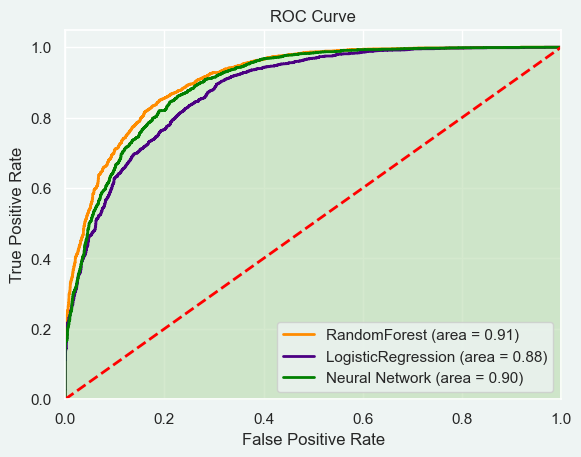

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, trees_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='RandomForest (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='papayawhip', alpha=0.3)

fpr, tpr, thresholds = roc_curve(y_test, reg_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='indigo', lw=2, label='LogisticRegression (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='thistle', alpha=0.3)

fpr, tpr, thresholds = roc_curve(y_test, net_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green', lw=2, label='Neural Network (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='lightgreen', alpha=0.3)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.savefig("roc_curve.png", dpi=300)